<a href="https://colab.research.google.com/github/Liping-LZ/BDAI_2425/blob/main/Supervised%20learning/Classification/DecisionTreeClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Load the data

Here we use a sample dataset from Scikit Learn

---



In [ ]:
from sklearn.datasets import load_breast_cancer
# import the data
data = load_breast_cancer()

In [ ]:
# show the dataset
print(data)

# print a return space
print('\n')

# show the keys
print(data.keys())

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [ ]:
# load the data (target and features) into DataFrame
import pandas as pd
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


# Step 2: Data checking & data cleaning

---

In [ ]:
# Understanding the data - summary statistics
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
# Understanding the data - data types
print(df.dtypes)

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [ ]:
# Check for missing values and remove them (if any)
print(df.isnull().sum())

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


# Step 3: Feature engineering
For this case, we skip this step because our data is pretty clean and simple.

---

# Step 4: Separate the target (Y) and features (X)

---

In [ ]:
X = df.drop('target', axis=1)
y = df['target']

# Step 5: Split data into training and test

---

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% training and 20% test

In [ ]:
# Check the data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 30)
(114, 30)
(455,)
(114,)


# Step 6: Select the algorithms
In this case, we are using decision tree for classification. Check the documentation:https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier


---

# Step 7: Create and train the model

---

In [ ]:
from sklearn.tree import DecisionTreeClassifier as DTC

# Initialize the Decision Tree Classifier()
clf = DTC() # here we just call the model from scikit learn with default hyperparameter

# Train the classifier
clf = clf.fit(X_train,y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Step 8: Check the model performance

---

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Evaluate the model using accuracy
accuracy = accuracy_score(y_test, y_pred) # Here we use accuracy and f1 score as the score metrics. You can use other metrics, check https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics for more scoring metrics
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nModel Accuracy:", accuracy)
print("\nModel f1 score:", f1)
print("\nConfusion Matrix:")
print(conf_matrix)


Model Accuracy: 0.9385964912280702

Model f1 score: 0.951048951048951

Confusion Matrix:
[[39  4]
 [ 3 68]]


# Step 9: Hyperparamter optimisation
We need to improve our model performance by finding the best hyperameters.

The following hyperparameters will be optimised:


*   Criterion - the function to measure split quality;
*   Max Depth - the number of child nodes to build in the tree;
*   Min sample split - the minimum number of samples needed to perform a split;
*   min_samples_leaf: Minimum samples in leaf nodes.
*   max_features: The number of features to consider when looking for the best split



---

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2', None]
}

# Create grid search object
grid_search = GridSearchCV(
    DTC(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='f1', # here we use f1 as the score metric to find the best parameters
    n_jobs=-1
)

# Fit grid search
grid_search.fit(X_train, y_train)

# Print results
print("\nBest parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)


Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best cross-validation score: 0.9579742850582431


# Step 10: Retrain the model and check the performance again

---

In [ ]:
clf = DTC(criterion= 'entropy', max_depth= 5, max_features=None, min_samples_leaf= 1, min_samples_split= 10)

# Train the classifier
clf = clf.fit(X_train,y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model - check the score metric again
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nModel Accuracy:", accuracy)
print("\nModel f1 score:", f1)
print("\nConfusion Matrix:")
print(conf_matrix)


Model Accuracy: 0.956140350877193

Model f1 score: 0.9655172413793104

Confusion Matrix:
[[39  4]
 [ 1 70]]


# (Optional): Visualise the confusion matrix

---

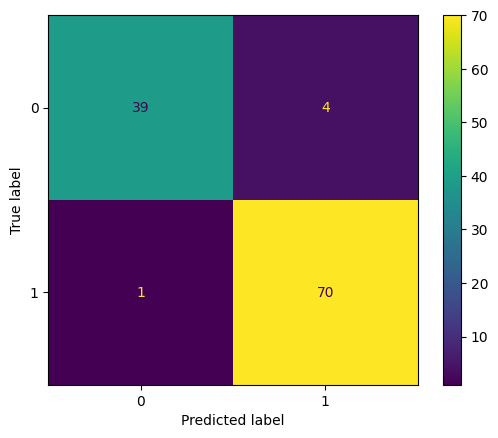

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Make predictions
y_pred = clf.predict(X_test)

# build a confusion matrix

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)


disp.plot()
plt.show()

Overall we have done a pretty good job. We have:


*   70 correctly predicted cases of cancer
*   39 correctly predicted cases of no cancer
*   1 cases where we predicted no cancer but the patient had cancer(!)
*   4 case where we predicted cancer but the patient didn't have cancer

# Now is your turn

The data you are using is `ai4i2020_new.csv`. Please download from Moodle. In this task, you are buidling decision tree model to predict maintenance. Please click into [this notebook](https://colab.research.google.com/drive/1U21l4Bt5CXo3cGpIHNnCl6zhv0SdEtIC?usp=sharing) to start the challenge.